# Project 2: Ames Housing Sale Price Prediction Model

> Authors: Djuwita Carney

---

## Objective
To make a prediction of housing price in Ames, Iowa as a function of many aspects of housing conditions

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

## Read Data
The `train` dataset consists of comprehensive housing data in Ames Iowa 

In [5]:
cd

/Users/djuwitacarney


In [6]:
cd Documents/GA/Submissions/Project_2

/Users/djuwitacarney/Documents/GA/Submissions/project_2


In [7]:
# Read in the dummy_train data in the data folder in this repository. dummy_train data is the clean train data with dummy columns for the qualitative variables
dummy_train = pd.read_csv('./datasets/dummy_train.csv')

In [8]:
# Read in the clean_test file. This is the file with clean test data data with dummy columns for the qualitative variables.
test = pd.read_csv('./datasets/clean_test.csv')

# Prepare regression parameters

In [9]:
# Identify common variables between Train and Test data for fitting to be possible

dummy_train_cols = dummy_train.columns
test_cols = test.columns

common_cols = dummy_train_cols.intersection(test_cols)
common_cols

Index(['PID', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF',
       ...
       'Paved Drive_Y', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=230)

In [10]:
test = test.loc[:, test.columns.isin(list(common_cols))]

In [11]:
features = common_cols
X_train = dummy_train[features]
y_train = dummy_train['SalePrice']
X_test = test

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test = lr.predict(X_test)
y_pred.max()

551545.6434108664

In [14]:
## Delete one out lier

for i in range(len(y_pred)):
    if y_pred[i] == y_pred.max():
        print(i, y_train[i], y_pred[i])
        y_train.drop(i, inplace = True)  
        X_train.drop(i, inplace = True)
    else:
        pass

1884 183850 551545.6434108664


/Users/djuwitacarney/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test = lr.predict(X_test)


In [17]:
## Lasso and Ridge

In [18]:
# Instantiate.
ss = StandardScaler()

# Fit.
X_train_sc = ss.fit_transform(X_train)

# Fit.
X_test_sc = ss.fit_transform(X_test)

In [19]:
lasso = LassoCV(n_alphas=100)

In [20]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## Cross validation
---

Use `cross_val_score` to evaluate all models.

In [21]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

0.8730775368092575

In [22]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.869267233121786

## Ridge Model Fitting and Evaluation
---

In [23]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [24]:
ridge.score(X_train_sc, y_train)

0.9256849049573573

In [25]:
ridge.score(X_test_sc, y_test)

0.9875727313005646

In [26]:
pred = ridge.predict(X_test_sc)

In [27]:
r2_score(y_test, pred)

0.9875727313005644

In [28]:
residuals_ridge = y_test - pred

## Lasso Model Fitting and Evaluation

In [29]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [30]:
lasso.score(X_train_sc, y_train)

0.9191863971677321

In [31]:
lasso.score(X_test_sc, y_test)

0.9802310778962371

In [32]:
pred = lasso.predict(X_test_sc)

In [33]:
r2_score(y_test, pred)

0.9802310778962371

In [34]:
residuals_lasso = y_test - pred

Text(0, 0.5, 'Ridge_residuals')

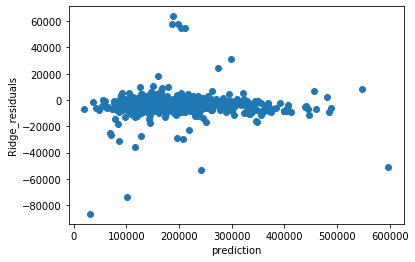

In [35]:
plt.scatter(pred, residuals_ridge)
plt.xlabel('prediction')
plt.ylabel('Ridge_residuals')

In [36]:
residuals_lasso = y_test - pred

Text(0, 0.5, 'Lasso_residuals')

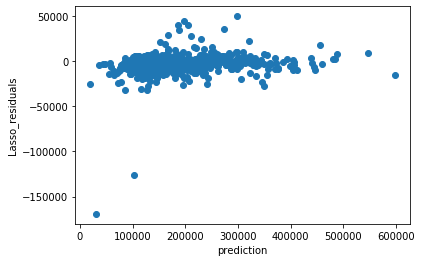

In [37]:
plt.scatter(pred, residuals_lasso)
plt.xlabel('prediction')
plt.ylabel('Lasso_residuals')

# Lasso scores for  test is higher than train score, indicating an under predicting model. Residuals lie around zero, except for a few outliers. The number of outliers is less than those of Ridge, how ever the residuals for those outliers are larger

## Cross validation
---

Use `cross_val_score` to evaluate all models.

In [39]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.8734296785053027

In [41]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_scores.mean()

0.8793247534897841

In [42]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5)
ridge_scores.mean()

0.8761787977676878

In [43]:
# Read in test file. to get the Id.
test_org = pd.read_csv('./datasets/test.csv')

In [44]:
id_number = test_org['Id']
id_number = pd.DataFrame(id_number)
id_number.dropna()
id_number.shape

(879, 1)

In [45]:
# Save prediction to csv file for submission
pred = pd.DataFrame(pred)
frame = [id_number, pred]
result = pd.concat(frame, axis = 1)
result.columns = ['Id','SalePrice']

result.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\result2.csv', index = False)

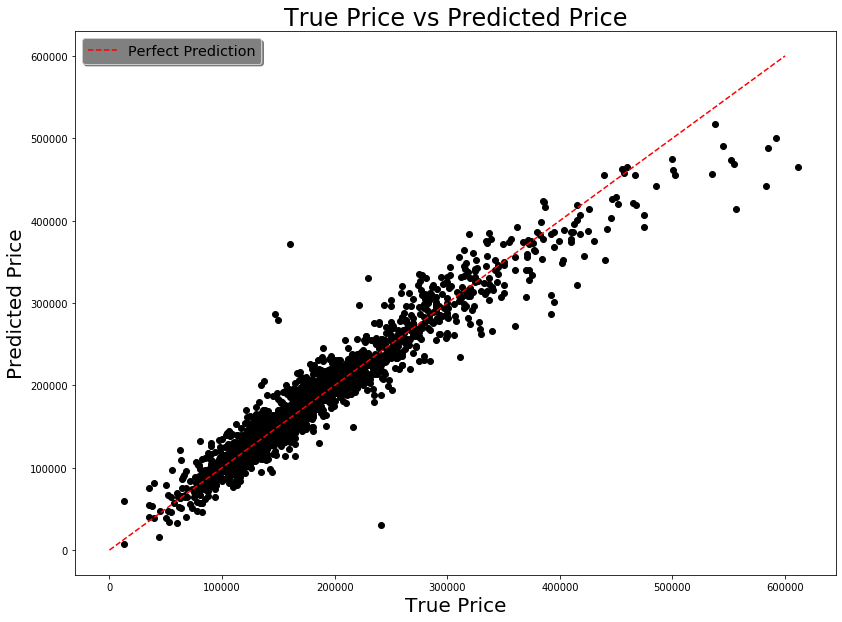

In [47]:
# A:

# Plot between true price and the predicted price
#
y0 = [0,600_000] # this line represents an ideal prediction line
y1 = [0, 600_000]

f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
ax.plot(y0, y1, 'k--', label='Perfect Prediction', color = 'red')
ax.scatter(y_train,y_pred,
            color = 'black')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.xlabel('True Price', fontsize = 20)
plt.ylabel('Predicted Price', fontsize = 20)

# Put a background color on the legend.
legend.get_frame().set_facecolor('grey')

# Create a title.
plt.title('True Price vs Predicted Price', fontsize = 24);

## Perform OSL

In [48]:
# This will produce a summary table where we can see how each prediction variable affects he SalePrice

import statsmodels.api as sm
lr2 = sm.OLS(y_train, X_train).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        09:18:02   Log-Likelihood:                -23343.
No. Observations:                2049   AIC:                         4.710e+04
Df Residuals:                    1841   BIC:                         4.827e+04
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
PID                   2.197e-06   7.93e-06      0.277      0.782   -1.34e-05    1.78e-05
Lot Area                 0.5395      0.120      4.508      0.000       0.305       0.774
Overall Qual          8019.6102    798.318     10.046      0.000    6453.906    9585.314
Year Built             138.1164     58.951      2.343      0.019      22.499     253.734
Year Remod/Add         210.9711     43.193      4.884      0.000     126.259     295.683
Mas Vnr Area            24.3094      4.961      4.900      0.000      14.580      34.038
BsmtFin SF 1             1.1621      6.004      0.194      0.847     -10.613      12.937
Bsmt Unf SF            -11.0678      6.077     -1.821      0.069     -22.987       0.851
Total Bsmt SF           24.3973      6.567      3.715      0.000      11.517      37.277
1st Flr SF              19.0247     12.587      1.511      0.131      -5.661      43.710
2nd Flr SF              24.4855     11.911      2.056      0.040       1.125      47.846
Gr Liv Area             25.5733     12.359      2.069      0.039       1.333      49.813
Bsmt Full Bath        3741.2839   1478.813      2.530      0.011     840.957    6641.611
Full Bath             3796.2900   1714.704      2.214      0.027     433.321    7159.259
Half Bath             1782.8847   1635.561      1.090      0.276   -1424.865    4990.634
Bedroom AbvGr        -3145.2582   1061.175     -2.964      0.003   -5226.492   -1064.025
Kitchen AbvGr        -1.264e+04   4920.375     -2.568      0.010   -2.23e+04   -2986.860
TotRms AbvGrd         1462.1224    742.937      1.968      0.049       5.035    2919.210
Fireplaces            3716.2988   1103.373      3.368      0.001    1552.304    5880.293
Garage Yr Blt          -66.7907     45.205     -1.477      0.140    -155.450      21.869
Garage Cars           6490.1217   1868.229      3.474      0.001    2826.050    1.02e+04
Garage Area              8.8154      6.551      1.346      0.179      -4.034      21.665
Wood Deck SF            11.7195      4.679      2.505      0.012       2.544      20.896
Open Porch SF            3.0531      9.155      0.333      0.739     -14.903      21.009
Enclosed Porch           8.4884     10.194      0.833      0.405     -11.504      28.481
Screen Porch            65.5539      9.773      6.707      0.000      46.386      84.722
Street_Grvl          -8.087e+04   1.52e+04     -5.325      0.000   -1.11e+05   -5.11e+04
Street_Pave          -7.437e+04   1.51e+04     -4.938      0.000   -1.04e+05   -4.48e+04
Lot Shape_IR1        -2.996e+04   7331.235     -4.086      0.000   -4.43e+04   -1.56e+04
Lot Shape_IR2        -2.845e+04   7850.159     -3.624      0.000   -4.38e+04   -1.31e+04
Lot Shape_IR3        -6.676e+04   9720.051     -6.868      0.000   -8.58e+04   -4.77e+04
Lot Shape_Reg        -3.007e+04   7355.283     -4.088    

In [49]:
# Read in test file. to get the Id.
test_org = pd.read_csv('./datasets/test.csv')

In [50]:
id_number = test_org['Id']
id_number = pd.DataFrame(id_number)
id_number.dropna()
id_number.shape

(879, 1)

In [51]:
# Save prediction to csv file for submission
pred = pd.DataFrame(pred)
frame = [id_number, pred]
result = pd.concat(frame, axis = 1)
result.columns = ['Id','SalePrice']

result.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\result2.csv', index = False)